### Employee Attrition
Employee attrition, also known as employee churn, refers to when employees leave a company or organization, either voluntarily or involuntarily. 
In many industries, employees can choose from various employers and may actively seek new opportunities, contributing to a dynamic and competitive 
job market. 
In this context, the challenge of retaining employees becomes significant. Companies often have large workforces and can't afford to spend extensive
resources on retaining every individual employee. The costs of such efforts would outweigh the benefits. However, if a company could predict which 
employees are likely to leave, it could focus its retention efforts on these "high-risk" employees, thereby reducing overall attrition. 
The ultimate goal is to maintain a stable and experienced workforce, which is crucial for long-term success.

Employee attrition is a critical metric because it is generally more cost-effective to retain existing employees than to recruit and train new ones. 
High turnover can lead to increased hiring and training costs, as well as disruptions in productivity and team cohesion.
To reduce employee attrition, companies need to identify employees at high risk of leaving. This requires a comprehensive understanding of employee 
interactions and experiences within the company, including factors such as job satisfaction, career development opportunities, workplace culture, 
and compensation.

For instance, younger employees, particularly those under the age of 23, might be more likely to leave for higher education opportunities. 
On the other hand, employees over the age of 40 may be approaching retirement. Understanding these demographic trends can help companies tailor 
their retention strategies effectively.
By addressing attrition, businesses can not only maintain their market position but also grow and thrive. 
The more experienced and skilled employees they retain, the lower the costs of hiring and training new staff, 
and the greater the overall productivity and profitability. Therefore, reducing employee attrition and implementing effective retention strategies 
are key focuses for any successful organization.

1) Loading libraries and data

In [122]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [124]:
df = pd.read_csv("C:/Users/ADMIN/Desktop/python_projects/Employeeee.csv")

2) Undertanding the data

In [125]:
df.head()

,Employment,YearsCode,YearsCodePro,LanguageHaveWorkedWith,Age,Gender,SalaryMonthly
0,"Employed, full-time",0,0,JavaScript;TypeScript,19,Man,"50,000"
1,"Employed, full-time",14,5,C#;C++;HTML/CSS;JavaScript;Python,33,Man,"45,000"
2,"Employed, full-time",20,17,C#;JavaScript;SQL;TypeScript,41,Man,"40,000"
3,"Employed, full-time",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,34,Woman,"25,000"
4,"Student, full-time",15,0,C++;Lua,28,Man,0


Employment Status:
Majority are employed full-time.
Significant number of students, both full-time and part-time.
Some respondents are independent contractors or freelancers.
Few respondents are unemployed but looking for work.
    
Coding Experience:
Wide range of coding experience, from complete beginners to highly experienced individuals.
Professional coding experience is also diverse, with a noticeable number of respondents having significant professional experience.
    
Programming Languages:
Popular languages include JavaScript, TypeScript, C#, Python, SQL, HTML/CSS.
Some respondents have experience with specialized or less common languages like MATLAB, Lua, Delphi, and Groovy.

Age Distribution:
Age ranges from young adults (17 years old) to mature professionals (58 years old).
Most respondents are in their 20s, 30s, and 40s.

Gender:
Majority of respondents identified as men.
A smaller but significant number identified as women.

Salary:
Monthly salary ranges widely, with several high earners and some earning nothing (likely students or unemployed).
Salaries generally correlate with experience, both in terms of years coding and professional coding experience.

2)Visualize missing values

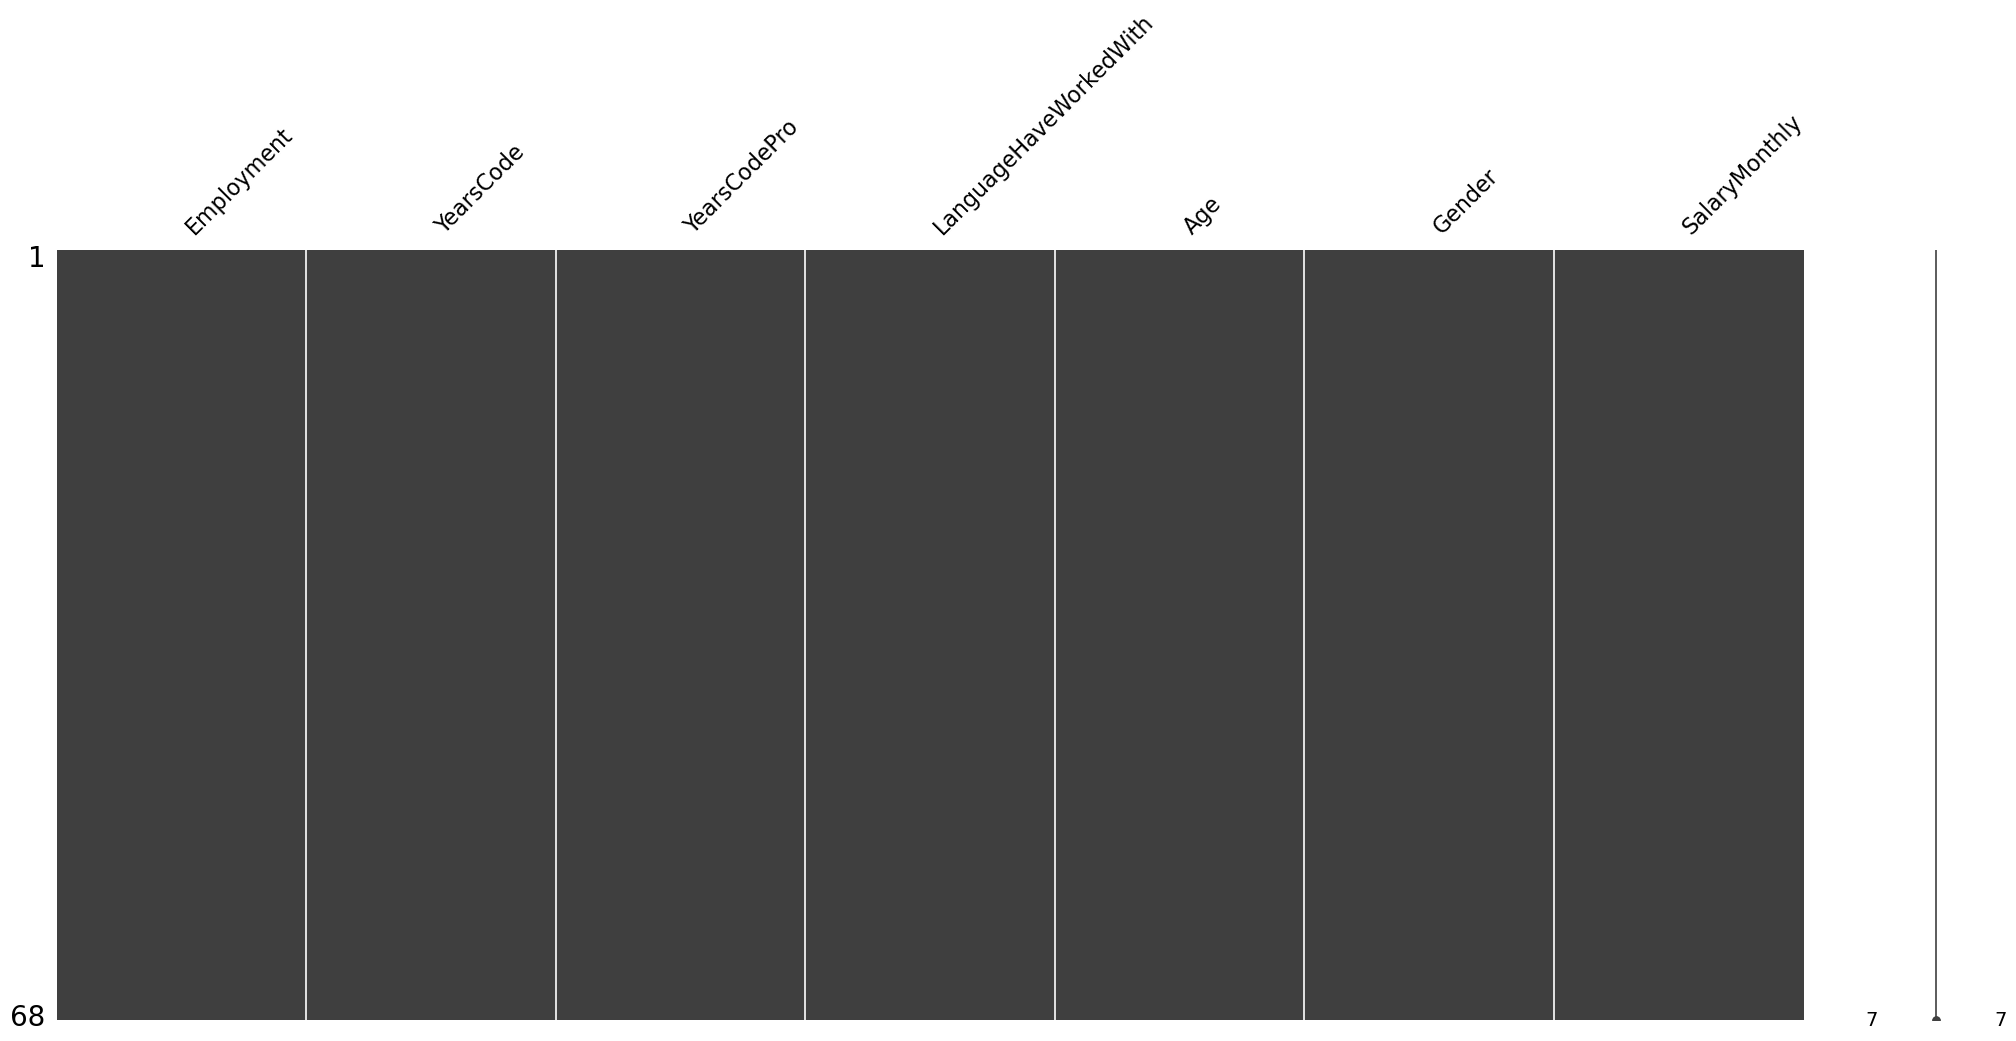

In [126]:
msno.matrix(df);

In [127]:
df.isnull().sum()

Employment                0
YearsCode                 0
YearsCodePro              0
LanguageHaveWorkedWith    0
Age                       0
Gender                    0
SalaryMonthly             0
dtype: int64

3) Data Visualization

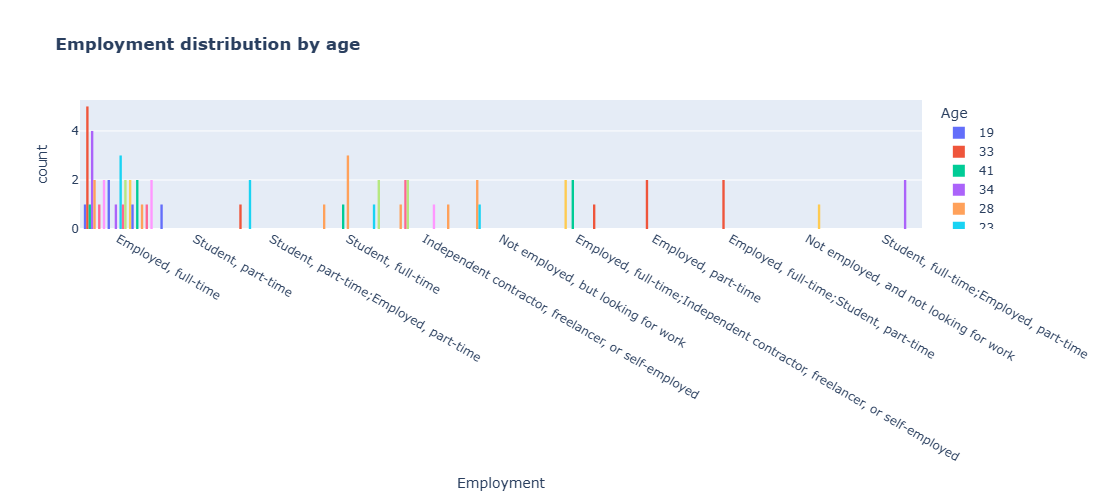

In [128]:
fig = px.histogram(df, x="Employment", color="Age", barmode="group", title="<b>Employment distribution by age</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

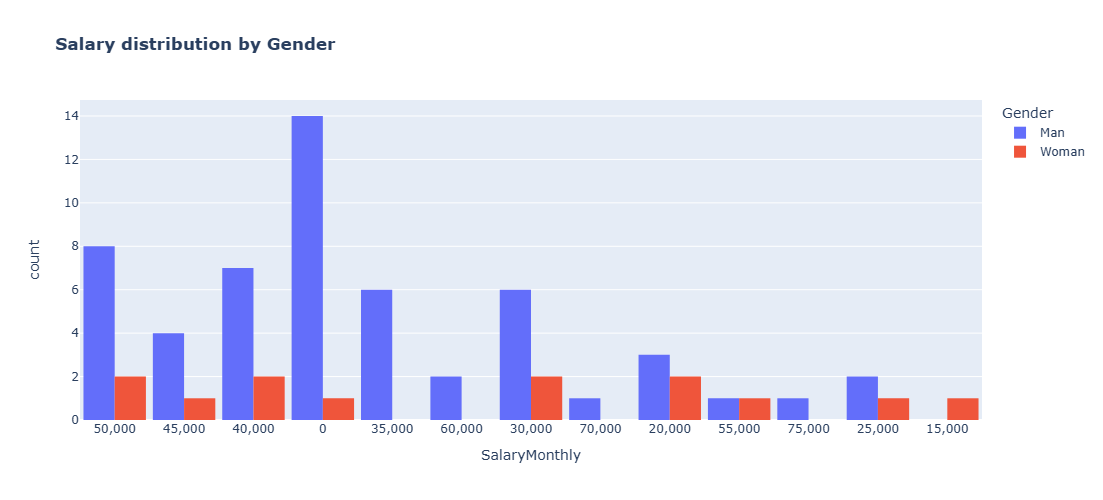

In [129]:
fig = px.histogram(df, x="SalaryMonthly", color="Gender", barmode="group", title="<b>Salary distribution by Gender</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

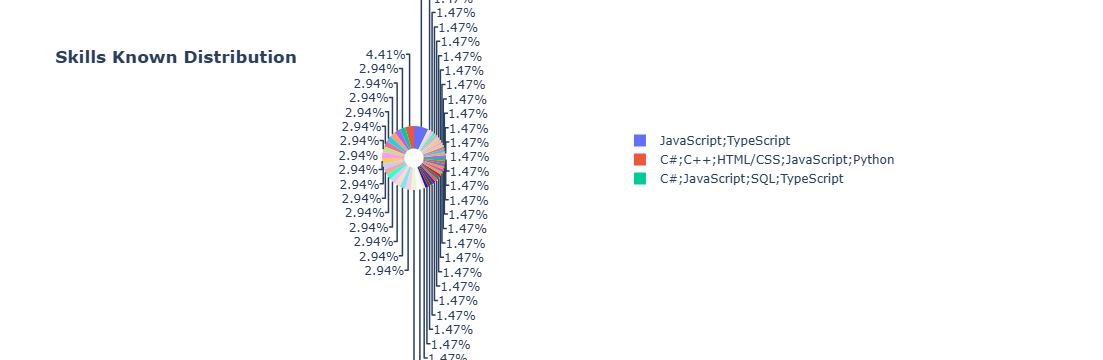

In [130]:
# Visualize employment distribution by skills
labels = df['LanguageHaveWorkedWith'].unique()
values = df['LanguageHaveWorkedWith'].value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Skills Known Distribution</b>")
fig.show()

In [131]:
df['Quitting'] = np.where((df['Age'] < 23) | (df['Age'] > 40), 'Yes', 'No')

In [132]:
quitting_df = df[df['Quitting'] == 'Yes']

In [133]:
df.Quitting

0     Yes
1      No
2     Yes
3      No
4      No
     ... 
63     No
64     No
65    Yes
66    Yes
67     No
Name: Quitting, Length: 68, dtype: object

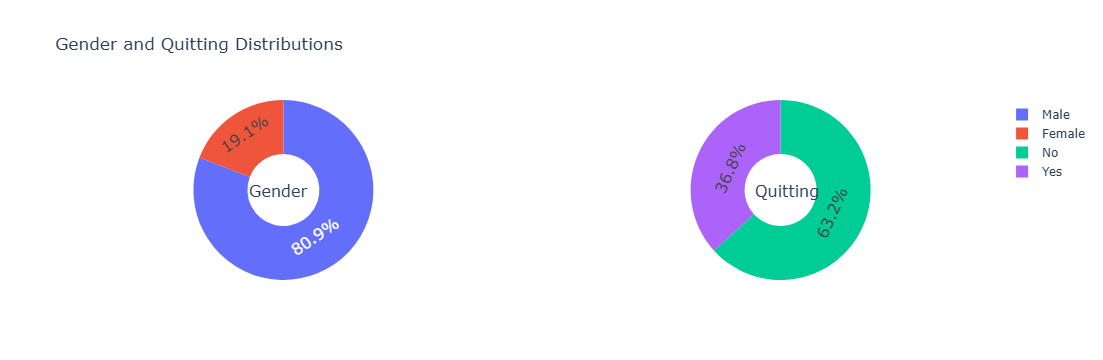

In [134]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Quitting'].value_counts(), name="Quitting"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Quitting Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.185, y=0.5, font_size=16, showarrow=False),
                 dict(text='Quitting', x=0.82, y=0.5, font_size=16, showarrow=False)])
fig.show()

In [135]:
df["Quitting"][df["Quitting"]=="No"].groupby(by=df["Gender"]).count()

Gender
Man      34
Woman     9
Name: Quitting, dtype: int64

In [136]:
df["Quitting"][df["Quitting"]=="Yes"].groupby(by=df["Gender"]).count()

Gender
Man      21
Woman     4
Name: Quitting, dtype: int64

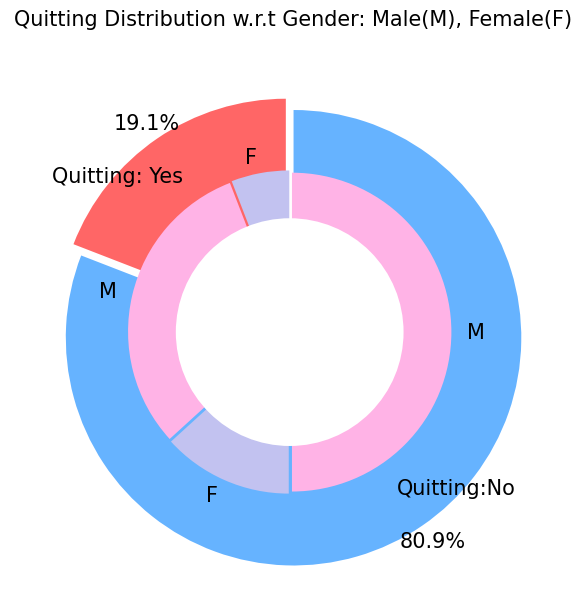

In [137]:
plt.figure(figsize=(6, 6))
labels =["Quitting: Yes","Quitting:No"]
values = [13,55]
labels_gender = ["F","M","F","M"]
sizes_gender = [4,21 , 9,34]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Quitting Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [138]:
df.SalaryMonthly

0     50,000
1     45,000
2     40,000
3     25,000
4          0
       ...  
63    25,000
64         0
65         0
66    50,000
67    15,000
Name: SalaryMonthly, Length: 68, dtype: object

In [139]:
df.YearsCode

0      0
1     14
2     20
3      8
4     15
      ..
63     6
64     9
65    24
66     5
67     9
Name: YearsCode, Length: 68, dtype: int64

In [140]:
print(quitting_df['YearsCode'].dtypes)

int64


In [141]:
quitting_df['YearsCode'] = pd.to_numeric(df['YearsCode'].replace('[\$,]', '', regex=True), errors='coerce')

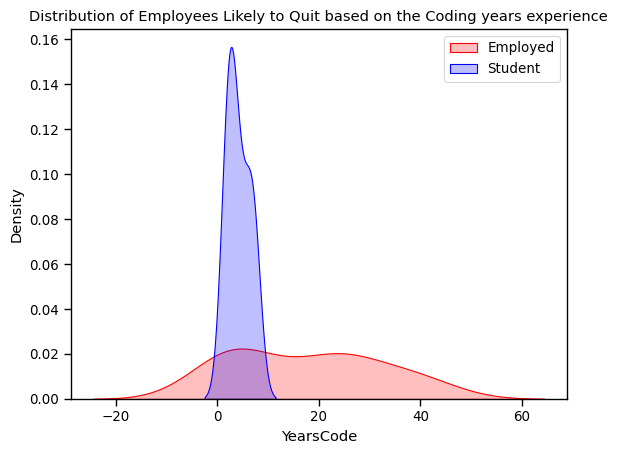

In [142]:
# Set plot style and context
sns.set_context("paper", font_scale=1.1)

# Plot KDE for Monthly Salary for employees who are likely to quit
ax = sns.kdeplot(quitting_df['YearsCode'][quitting_df["Employment"].str.contains('Employed', na=False)],
                 color="Red", shade=True)
ax = sns.kdeplot(quitting_df['YearsCode'][quitting_df["Employment"].str.contains('Student', na=False)],
                 ax=ax, color="Blue", shade=True)

# Customize legend and labels
ax.legend(["Employed", "Student",], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('YearsCode')
ax.set_title('Distribution of Employees Likely to Quit based on the Coding years experience')

# Show plot
plt.show()

In [143]:
df['SalaryMonthly'] = df['SalaryMonthly'].replace('[\$,]', '', regex=True).astype(int)

In [144]:
df.SalaryMonthly

0     50000
1     45000
2     40000
3     25000
4         0
      ...  
63    25000
64        0
65        0
66    50000
67    15000
Name: SalaryMonthly, Length: 68, dtype: int32

In [145]:
quitting_df['SalaryMonthly'] = pd.to_numeric(df['SalaryMonthly'].replace('[\$,]', '', regex=True), errors='coerce')

In [146]:
print(quitting_df['SalaryMonthly'].dtypes)

int32


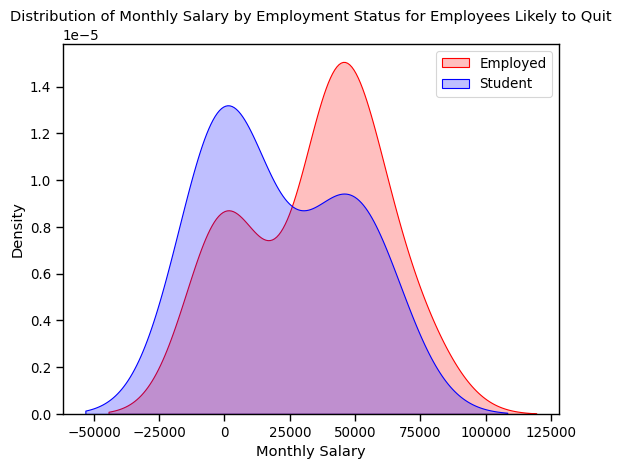

In [147]:
sns.set_context("paper", font_scale=1.1)

# Plot KDE for Monthly Salary for employees who are likely to quit
ax = sns.kdeplot(quitting_df['SalaryMonthly'][quitting_df["Employment"].str.contains('Employed', na=False)],
                 color="Red", shade=True)
ax = sns.kdeplot(quitting_df['SalaryMonthly'][quitting_df["Employment"].str.contains('Student', na=False)],
                 ax=ax, color="Blue", shade=True)

# Customize legend and labels
ax.legend(["Employed", "Student", "Not employed"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Salary')
ax.set_title('Distribution of Monthly Salary by Employment Status for Employees Likely to Quit')

# Show plot
plt.show()

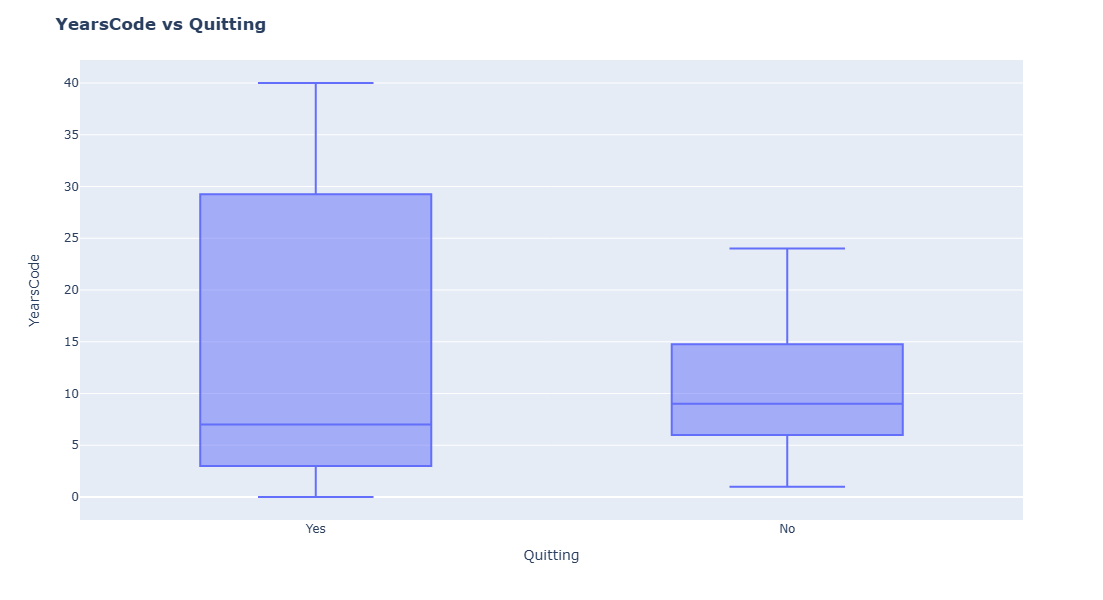

In [148]:
fig = px.box(df, x='Quitting', y = 'YearsCode')

# Update yaxis properties
fig.update_yaxes(title_text='YearsCode', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Quitting', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>YearsCode vs Quitting</b>',
)

fig.show()

In [149]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [150]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,Employment,YearsCode,YearsCodePro,LanguageHaveWorkedWith,Age,Gender,SalaryMonthly,Quitting
0,0,0,0,40,19,0,50000,1
1,0,14,5,9,33,0,45000,0
2,0,20,17,20,41,0,40000,1
3,0,8,3,16,34,1,25000,0
4,7,15,0,26,28,0,0,0


In [151]:
plt.figure(figsize=(14,7))
df.corr()['Quitting'].sort_values(ascending = False)

Quitting                  1.000000
YearsCodePro              0.363506
YearsCode                 0.304092
Age                       0.185999
Employment                0.055694
SalaryMonthly             0.012133
Gender                   -0.060453
LanguageHaveWorkedWith   -0.138576
Name: Quitting, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [152]:
X = df.drop(columns = ['Quitting'])
y = df['Quitting'].values

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [155]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

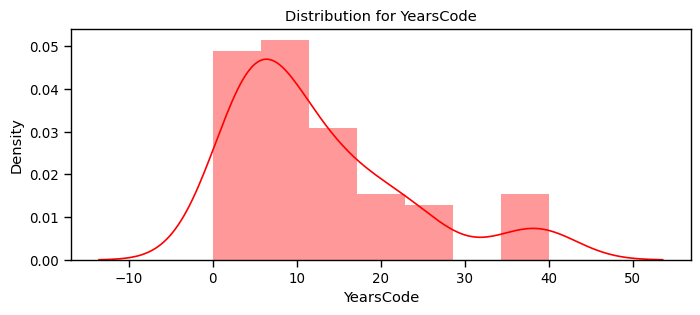

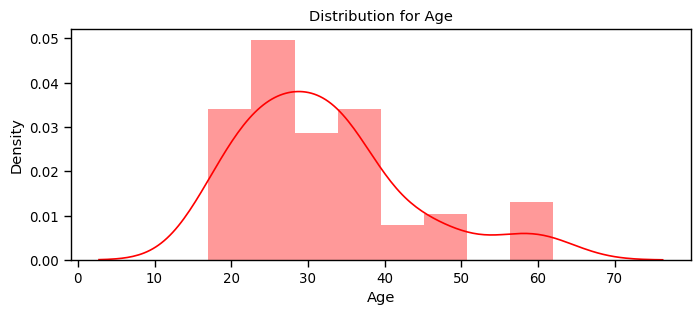

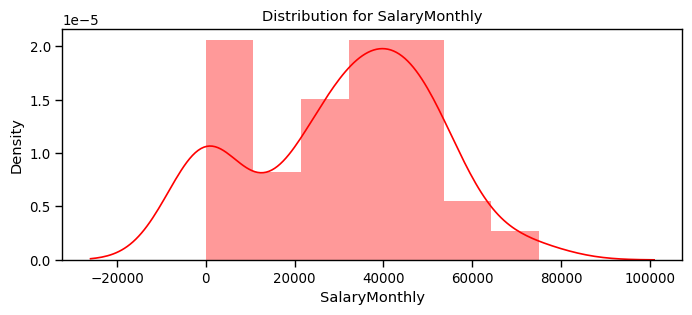

In [156]:
num_cols = ["YearsCode",'Age','SalaryMonthly']
for feat in num_cols: distplot(feat, df)

In [157]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')), columns=num_cols)

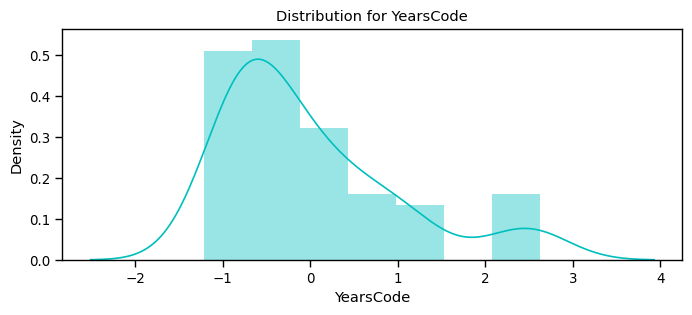

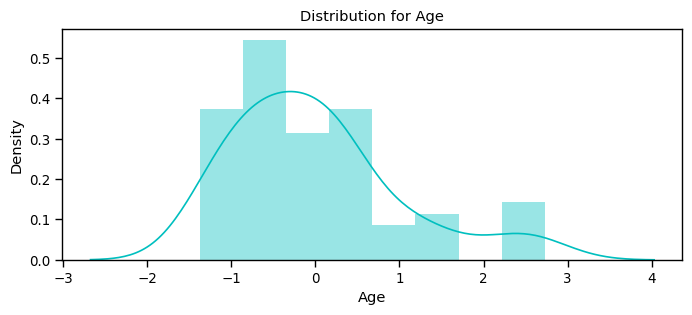

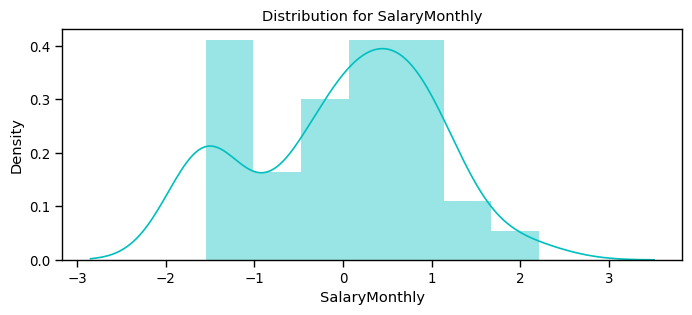

In [158]:
for feat in num_cols:
    distplot(feat, df_std, color='c')

In [159]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['LanguageHaveWorkedWith', 'Employment', 'Gender'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [160]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [163]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.6666666666666666


In [164]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       1.00      0.12      0.22         8

    accuracy                           0.67        21
   macro avg       0.82      0.56      0.51        21
weighted avg       0.78      0.67      0.57        21



In [165]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7142857142857143


In [166]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        13
           1       1.00      0.25      0.40         8

    accuracy                           0.71        21
   macro avg       0.84      0.62      0.61        21
weighted avg       0.80      0.71      0.66        21



In [167]:
from sklearn import metrics

In [168]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.9523809523809523


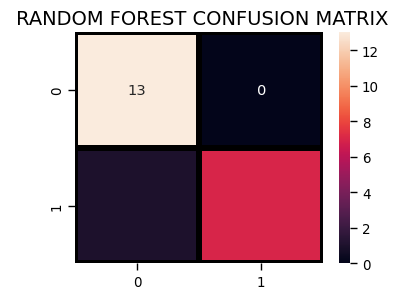

In [169]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

In [170]:
from sklearn.metrics import roc_curve

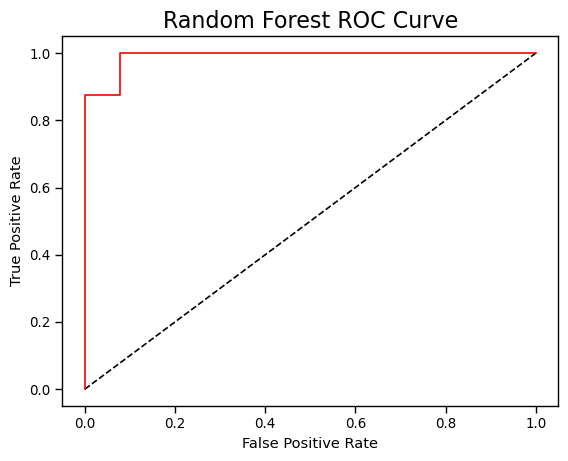

In [171]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

Based on the analysis, we observe that there are a total of 68 employees in the specified age groups (below 23 and above 40). 
Out of these, 34 men and 9 women are quitting their jobs, while the remaining employees are not quitting.

Employee attrition, particularly among those at the early and later stages of their careers, poses a significant challenge to an
organization's stability and growth. To address this issue, companies must adopt strategies to better understand and support these employees. 
Identifying employees at risk of leaving and enhancing their job satisfaction is crucial. Providing career development opportunities, 
improving workplace culture, and offering flexible work arrangements can help retain young and older employees. Additionally, 
conducting exit interviews with departing employees to understand their reasons for leaving can provide valuable insights for developing 
proactive measures to prevent future attrition. 
By focusing on these strategies, companies can reduce employee turnover and build a more loyal and engaged workforce.